# Importing All necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [5]:
df=pd.read_csv('Auro_Insaurance_Fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Shape

In [6]:
df.shape

(1000, 40)

# columns

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Checking the missing values

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Dropping _c39 column

In [10]:
df.drop(columns=['_c39'],axis=1,inplace=True)

In [11]:
df.shape

(1000, 39)

### Again check the missing values

In [13]:
df.isnull().values.any()

False

# Informations

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Observations: 
    
    In the dataset there are no null values present. But "?" values present here. So, I will encode "?" as null values and again check it.

### Replacing the "?" marks with null values

In [16]:
df=df.replace('?',np.NaN)
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Checking for Null values again

In [17]:
df.isnull().values.any()

True

### Check null values in columns

In [18]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

### Missing values via visualization

<AxesSubplot:>

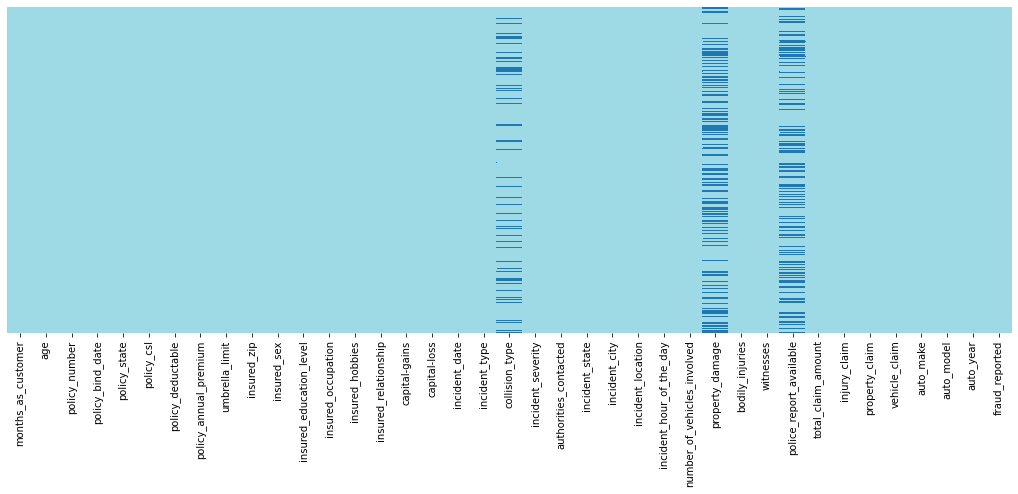

In [20]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')

### Imputing the missing values with mode because they are catagorical

In [31]:
for col in ['collision_type','property_damage','police_report_available']:
    df[col].fillna(df[col].mode()[0],inplace=True)

### Now, again check the missing values

In [23]:
df.isnull().values.any()

False

# Exploring the catagorical columns : 

### Printing the object data type column and their unique values

In [24]:
for column in df.columns: 
    if df[column].dtypes==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print("***********************************************************************************************")
        print('\n')

policy_bind_date:['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

### For analyzing the data with target i.e. fraud_reported we have to change income into numeric type

### Changing the data type od target column

In [25]:
df['fraud_reported']=df['fraud_reported'].map({'N':0,'Y':1})
df['fraud_reported'].dtypes

dtype('int64')

In [26]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Observations: 
    
    Out of 1000 reports, 247 are reported as fraud

# Summary statistics

In [27]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


# Correlation

In [28]:
df_corr=df.corr()
df_corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


### For better understanding we can see it via visualization (with the help of heatmap)

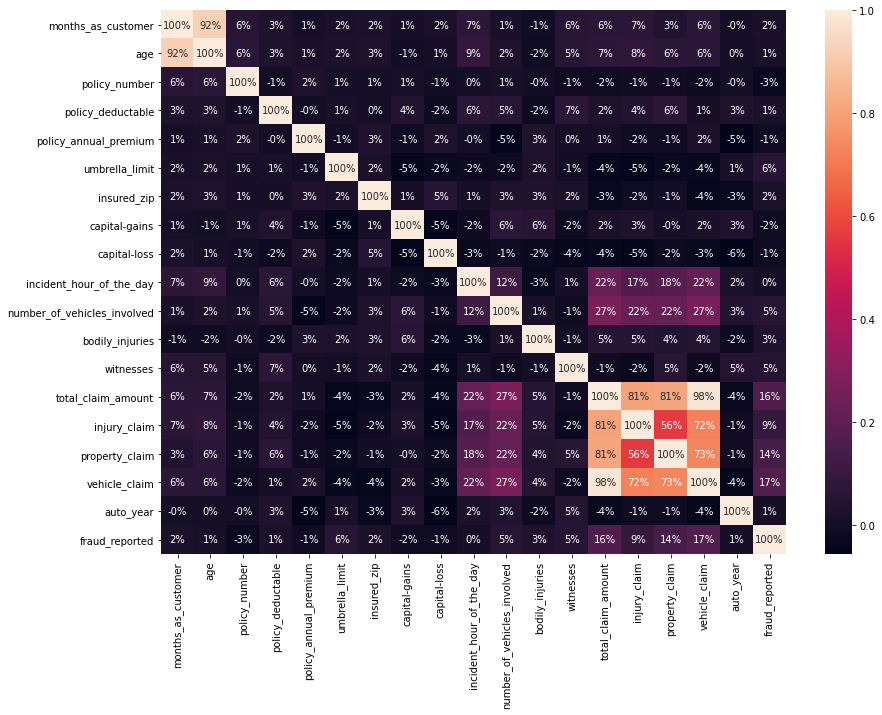

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr,annot=True,fmt='.0%')
plt.show()

### Observations: 
    
    1. total_claim_amount,injury_claim,property_claim,vehicle_claim are highly correlated with each other.
    
    2. months_as_customer and age are also highly correlated with each other.So, as a age of person increases the number of months as customer also increases.
    

### Correlation with target column

Text(0.5, 1.0, 'Correlation with Target Variable')

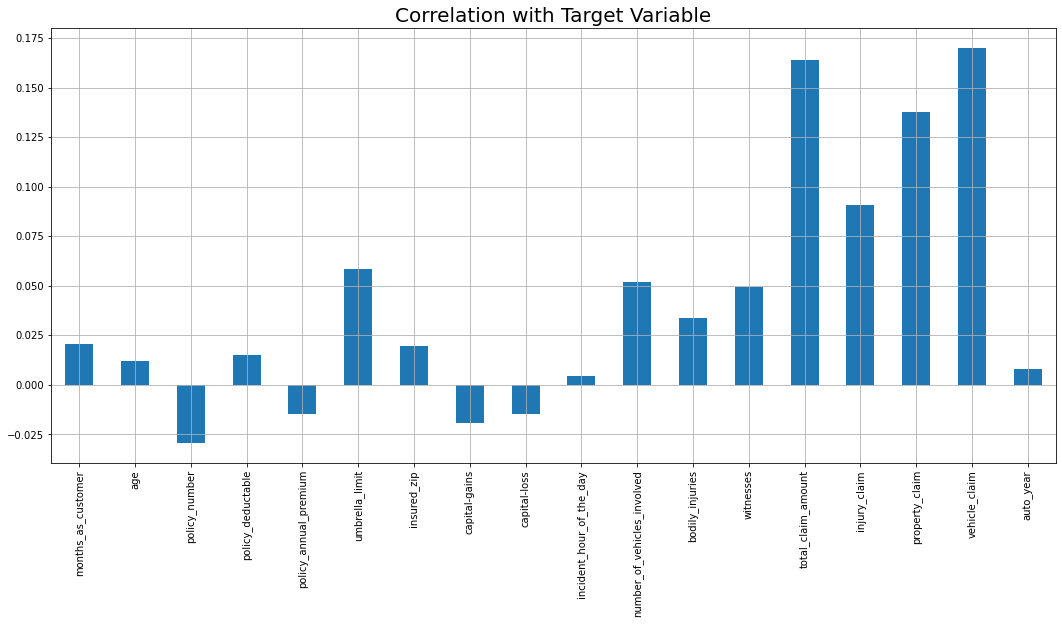

In [35]:
plt.figure(figsize=(18,8))
df.drop('fraud_reported',axis=1).corrwith(df['fraud_reported']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable",fontsize=20)

# Data Visualization

# Univariate Analysis

### Check the number of fraud cases

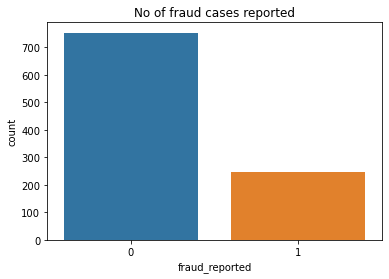

0    753
1    247
Name: fraud_reported, dtype: int64


In [37]:
plt.subplots(figsize=(6,4))
sns.countplot(x="fraud_reported",data=df)
plt.title("No of fraud cases reported")
plt.show()

print(df['fraud_reported'].value_counts())

Observations :
    
    Out of 1000 cases only 247 case reported as fraud

### insured_sex

### insured_education_level 

### insured_occupation

### incident_type 

### auto_make 

### age  (mean)

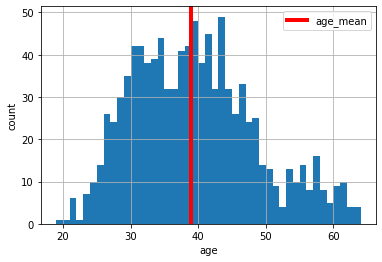

In [38]:
ages=df['age'].hist(bins=max(df['age']-min(df['age'])))
mean_val=np.mean(df['age'])
plt.axvline(mean_val,linewidth=4,color='red',label='age_mean')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

### policy_annual_premium (mean)

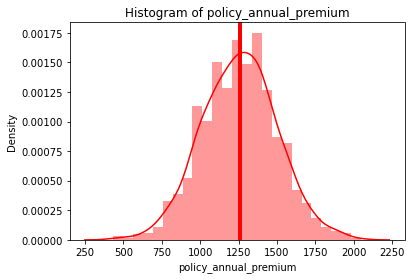

In [45]:
sns.distplot(df['policy_annual_premium'],color='r')
mean_val=np.mean(df['policy_annual_premium'])
plt.axvline(mean_val,linewidth=4,color='red',label='policy_annual_premium_mean')
plt.title('Histogram of policy_annual_premium')
plt.show()

### total_claim_amount(Histogram for continuous)

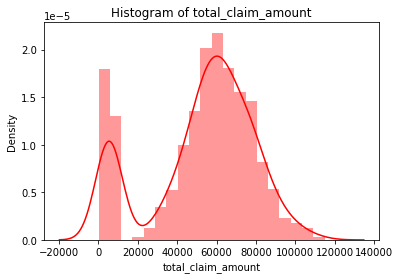

In [39]:
sns.distplot(df['total_claim_amount'],color='r')
plt.title('Histogram of total_claim_amount')
plt.show()

### injury_claim

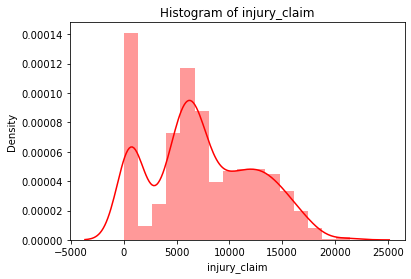

In [40]:
sns.distplot(df['injury_claim'],color='r')
plt.title('Histogram of injury_claim')
plt.show()

### property_claim

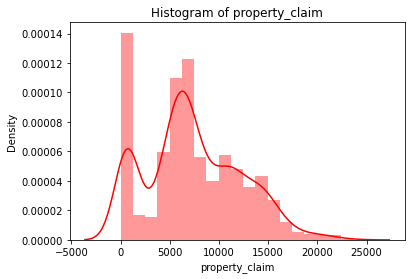

In [41]:
sns.distplot(df['property_claim'],color='r')
plt.title('Histogram of property_claim')
plt.show()

# Bivariate Analysis

Our feature variable of interest is fraus_reported

It refers to the fraud cases

We already change it in Integer valued as it contains only two numbers 0 and 1

1 stands for Yes Fraud

0 stands for No Fraud

In [46]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# FaceGrid

### age vs fraud_reported

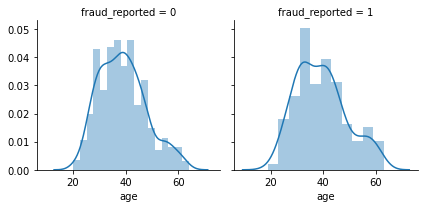

In [47]:
facet=sns.FacetGrid(df,col='fraud_reported')
facet.map(sns.distplot,"age")
plt.show()

### insured_sex vs fraud_reported (both of the columns are catagorical)

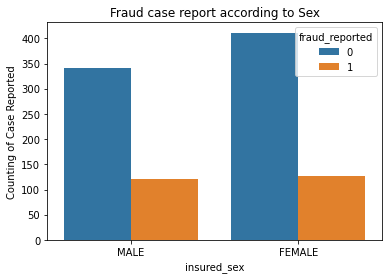

insured_sex  fraud_reported
FEMALE       0                 411
             1                 126
MALE         0                 342
             1                 121
Name: fraud_reported, dtype: int64


In [48]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)
plt.title("Fraud case report according to Sex")
plt.ylabel("Counting of Case Reported")
plt.show()

print(df.groupby('insured_sex')['fraud_reported'].value_counts())

### insured_education_level vs fraud_reported

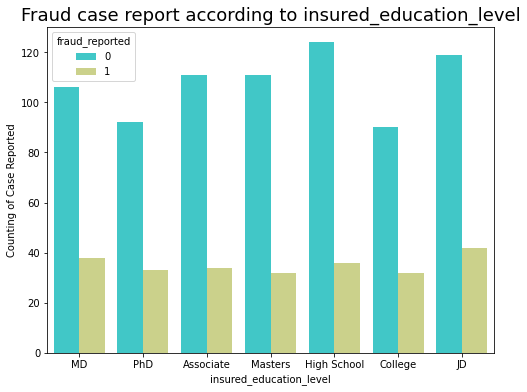

insured_education_level  fraud_reported
Associate                0                 111
                         1                  34
College                  0                  90
                         1                  32
High School              0                 124
                         1                  36
JD                       0                 119
                         1                  42
MD                       0                 106
                         1                  38
Masters                  0                 111
                         1                  32
PhD                      0                  92
                         1                  33
Name: fraud_reported, dtype: int64


In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df,palette='rainbow')
plt.title("Fraud case report according to insured_education_level",fontsize=18)
plt.ylabel("Counting of Case Reported")
plt.show()

print(df.groupby('insured_education_level')['fraud_reported'].value_counts())

### insured_occupation vs fraud_reported

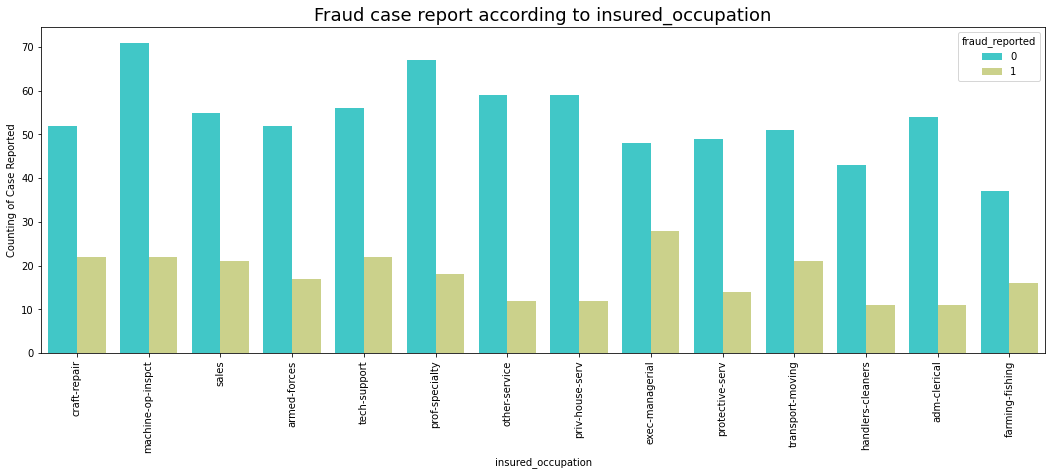

insured_occupation  fraud_reported
adm-clerical        0                 54
                    1                 11
armed-forces        0                 52
                    1                 17
craft-repair        0                 52
                    1                 22
exec-managerial     0                 48
                    1                 28
farming-fishing     0                 37
                    1                 16
handlers-cleaners   0                 43
                    1                 11
machine-op-inspct   0                 71
                    1                 22
other-service       0                 59
                    1                 12
priv-house-serv     0                 59
                    1                 12
prof-specialty      0                 67
                    1                 18
protective-serv     0                 49
                    1                 14
sales               0                 55
                    1 

In [56]:
plt.figure(figsize=(18,6))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df,palette='rainbow')
plt.title("Fraud case report according to insured_occupation",fontsize=18)
plt.ylabel("Counting of Case Reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_occupation')['fraud_reported'].value_counts())

### insured_hobbies vs fraud_reported

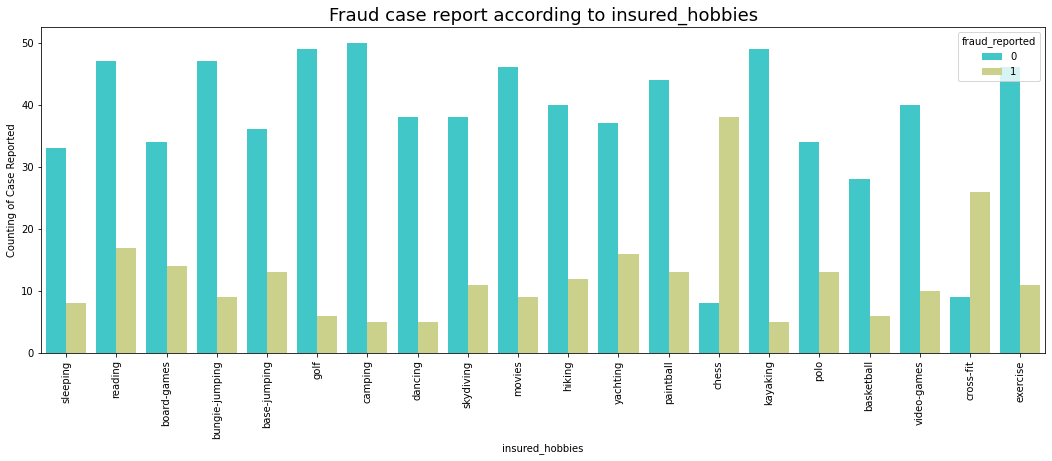

insured_hobbies  fraud_reported
base-jumping     0                 36
                 1                 13
basketball       0                 28
                 1                  6
board-games      0                 34
                 1                 14
bungie-jumping   0                 47
                 1                  9
camping          0                 50
                 1                  5
chess            1                 38
                 0                  8
cross-fit        1                 26
                 0                  9
dancing          0                 38
                 1                  5
exercise         0                 46
                 1                 11
golf             0                 49
                 1                  6
hiking           0                 40
                 1                 12
kayaking         0                 49
                 1                  5
movies           0                 46
                 1

In [57]:
plt.figure(figsize=(18,6))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df,palette='rainbow')
plt.title("Fraud case report according to insured_hobbies",fontsize=18)
plt.ylabel("Counting of Case Reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_hobbies')['fraud_reported'].value_counts())

### incident_date vs fraud_reported

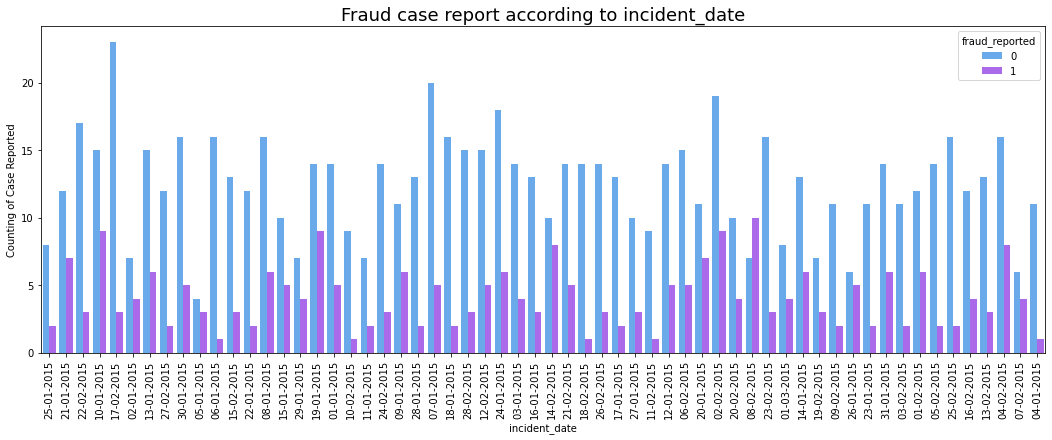

incident_date  fraud_reported
01-01-2015     0                 14
               1                  5
01-02-2015     0                 12
               1                  6
01-03-2015     0                  8
                                 ..
29-01-2015     1                  4
30-01-2015     0                 16
               1                  5
31-01-2015     0                 14
               1                  6
Name: fraud_reported, Length: 120, dtype: int64


In [59]:
plt.figure(figsize=(18,6))
sns.countplot(x='incident_date',hue='fraud_reported',data=df,palette='cool')
plt.title("Fraud case report according to incident_date",fontsize=18)
plt.ylabel("Counting of Case Reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_date')['fraud_reported'].value_counts())

### incident_type vs fraud_reported

### collision_type vs fraud_reported

### incident_severity vs fraud_reported

### incident_state vs fraud_reported

### incident_city vs fraud_reported

### property_damage vs fraud_reported

### incident_severity vs fraud_reported

### police_report_available vs fraud_reported

### auto_make vs fraud_reported

# Converting the catagorical data into numeric variables

In [60]:
    from sklearn.preprocessing import LabelEncoder
    
    le=LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype==np.number:
            continue
        df[column]=le.fit_transform(df[column])    

In [61]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,486,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,6,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,812,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,850,...,1,0,81,70,36,66,0,31,14,0


# Plotting Outliers

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

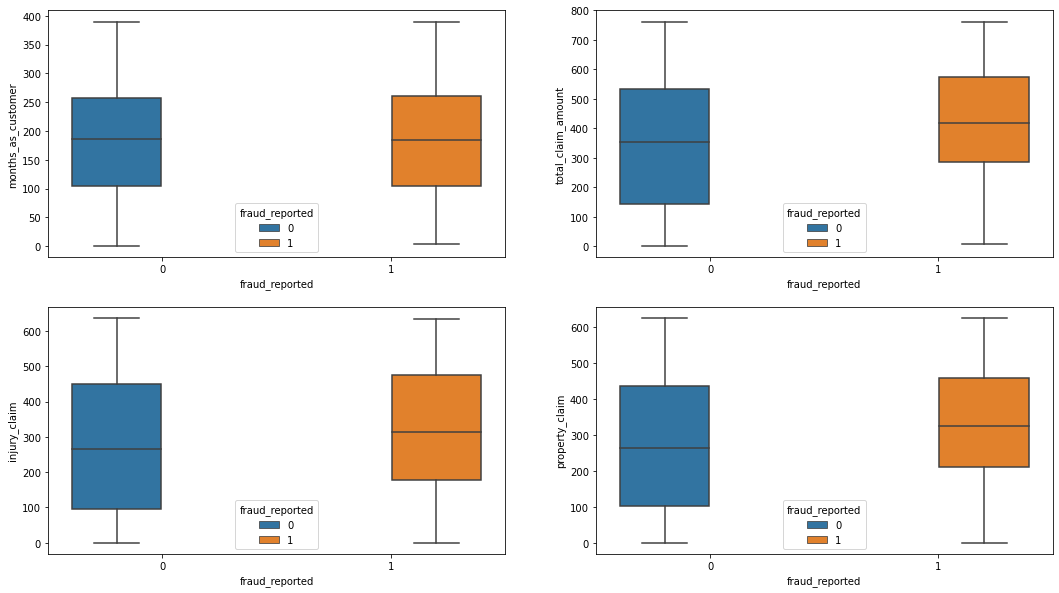

In [62]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(18,10))
sns.boxplot(ax=ax1,x='fraud_reported',y='months_as_customer',hue='fraud_reported',data=df)
sns.boxplot(ax=ax2,x='fraud_reported',y='total_claim_amount',hue='fraud_reported',data=df)
sns.boxplot(ax=ax3,x='fraud_reported',y='injury_claim',hue='fraud_reported',data=df)
sns.boxplot(ax=ax4,x='fraud_reported',y='property_claim',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

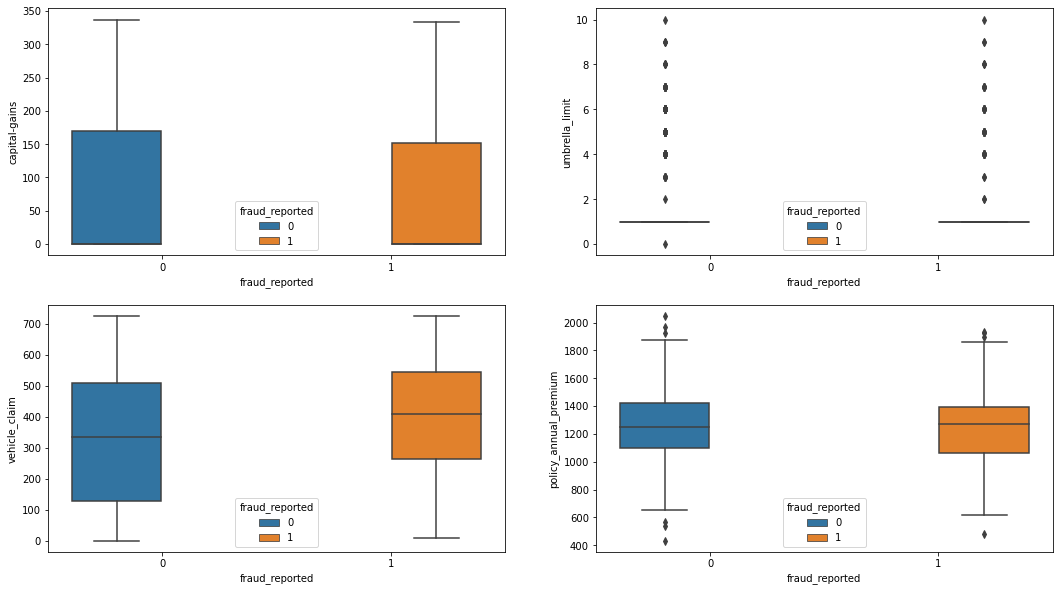

In [64]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(18,10))
sns.boxplot(ax=ax1,x='fraud_reported',y='capital-gains',hue='fraud_reported',data=df)
sns.boxplot(ax=ax2,x='fraud_reported',y='umbrella_limit',hue='fraud_reported',data=df)
sns.boxplot(ax=ax3,x='fraud_reported',y='vehicle_claim',hue='fraud_reported',data=df)
sns.boxplot(ax=ax4,x='fraud_reported',y='policy_annual_premium',hue='fraud_reported',data=df)

From the above grapg it is clearly shown that there are some outliers present in our dataset which needs to be removed

# Removing outliers

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
print(df.shape,"\t\t",df_new.shape)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 875, 922, 975], dtype=int64), array([8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8], dtype=int64))
(1000, 39) 		 (982, 39)


In [66]:
df=df_new
df.shape

(982, 39)

# Model Training

In [67]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,486,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,6,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,812,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,850,...,1,0,81,70,36,66,0,31,14,0


### spilitting the data into input and output variable

In [68]:
x=df.drop(columns=['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,480,532,2,1,1,1406.91,1,486,...,1,2,1,563,258,512,545,10,1,9
1,212,23,257,821,1,1,2,1197.22,5,519,...,0,0,0,44,46,45,38,8,12,12
2,123,10,672,186,2,0,2,1413.14,5,6,...,2,3,0,143,337,104,116,4,30,12
3,239,22,140,766,0,1,2,1415.74,6,812,...,1,2,0,451,245,249,521,3,34,19
4,212,25,286,181,0,2,1,1583.91,6,850,...,0,1,0,81,70,36,66,0,31,14


In [69]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

### Checking the shape of the input and output variable

In [70]:
print(x.shape,'\t\t', y.shape)

(982, 38) 		 (982,)


### Scaling in input variables

In [71]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

### spliting the data into training and testing set

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

### Checking the shape

In [73]:
print(x_train.shape,'\t\t',x_test.shape)
print(y_train.shape,'\t\t',y_test.shape)

(785, 38) 		 (197, 38)
(785,) 		 (197,)


# Importing all the model Library

In [74]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Importinf boosting models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

# All algorithms by using for loop

In [75]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("\033[1m"+ 'accuracy_score of',m,'is : ' + "\033[0m" )  # Make the line bold
    print(accuracy_score(y_test,predm))
    print("confusion_matrix : ",confusion_matrix(y_test,predm))
    print("classification_report : ",classification_report(y_test,predm))
    print('*******************************************************************')
    print('\n')

accuracy_score of LogisticRegression() is : 
0.7868020304568528
confusion_matrix :  [[138  11]
 [ 31  17]]
classification_report :                precision    recall  f1-score   support

           0       0.82      0.93      0.87       149
           1       0.61      0.35      0.45        48

    accuracy                           0.79       197
   macro avg       0.71      0.64      0.66       197
weighted avg       0.77      0.79      0.77       197

*******************************************************************


accuracy_score of DecisionTreeClassifier() is : 
0.817258883248731
confusion_matrix :  [[132  17]
 [ 19  29]]
classification_report :                precision    recall  f1-score   support

           0       0.87      0.89      0.88       149
           1       0.63      0.60      0.62        48

    accuracy                           0.82       197
   macro avg       0.75      0.75      0.75       197
weighted avg       0.81      0.82      0.82       197

*********

# Cross validate all algorithm by using loop

In [76]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model : ",m)
    print("Mean Score : ",score.mean())
    print("Standard deviation : ",score.std())
    print('*******************************************************************')
    print('\n')

Model :  LogisticRegression()
Mean Score :  0.7779839208410637
Standard deviation :  0.039781392000306164
*******************************************************************


Model :  DecisionTreeClassifier()
Mean Score :  0.7882807668521954
Standard deviation :  0.032392660379297465
*******************************************************************


Model :  KNeighborsClassifier()
Mean Score :  0.7332096474953618
Standard deviation :  0.041348958554913266
*******************************************************************


Model :  GaussianNB()
Mean Score :  0.7402597402597403
Standard deviation :  0.04778516707540904
*******************************************************************


Model :  SVC()
Mean Score :  0.7514945372088229
Standard deviation :  0.014339246877095242
*******************************************************************


Model :  RandomForestClassifier()
Mean Score :  0.7739022881880024
Standard deviation :  0.033634791406598884
****************************

# Using GridSearchCV to find the best parameter

### Logistic Regression

In [77]:
parameters={'C':[1,10],'random_state':range(42,56)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


### DecisionTreeClassifier()

In [78]:
parameters={'criterion':['gini','entropy'],'random_state':range(42,56)}
dtc=DecisionTreeClassifier()

clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 46}


### GradientBoostingClassifier()

In [79]:
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300]}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'mse', 'n_estimators': 100}


### Applying the result in models

In [81]:
lg=LogisticRegression(C=1, random_state=42)
dtc=DecisionTreeClassifier(criterion='entropy', random_state=46)
gbc=GradientBoostingClassifier(criterion='mse',n_estimators=100,random_state=42,learning_rate=0.1,max_depth=4)
bc=BaggingClassifier(n_estimators=250)

In [91]:
models=[]
models.append(('LogisticRegression',lg))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('BaggingClassifier',bc))

******************************* LogisticRegression *******************************


LogisticRegression(C=1, random_state=42)


Accuracy Score : 0.7868020304568528


Cross Val Score :  0.7800310800310801


ROC_AUC_SCORE :  0.6401705816554809


[[138  11]
 [ 31  17]]


Classification_report 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       149
           1       0.61      0.35      0.45        48

    accuracy                           0.79       197
   macro avg       0.71      0.64      0.66       197
weighted avg       0.77      0.79      0.77       197



AxesSubplot(0.125,0.808774;0.775x0.0712264)


******************************* DecisionTreeClassifier *******************************


DecisionTreeClassifier(criterion='entropy', random_state=46)


Accuracy Score : 0.8223350253807107


Cross Val Score :  0.7780419580419583


ROC_AUC_SCORE :  0.7201482102908278


[[137  12]
 [ 23  25]]


Classification_report 
               p

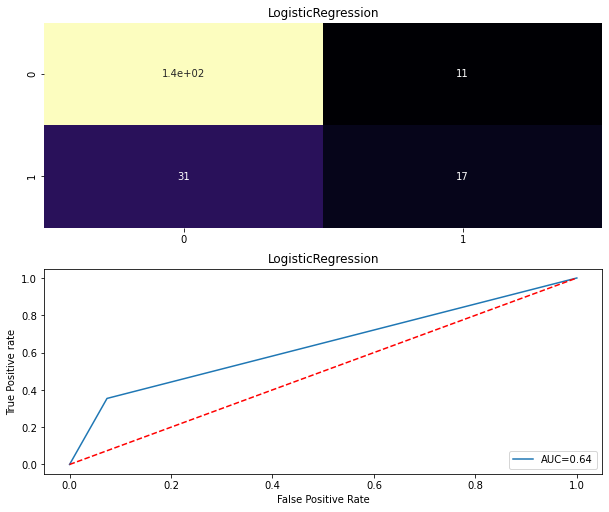

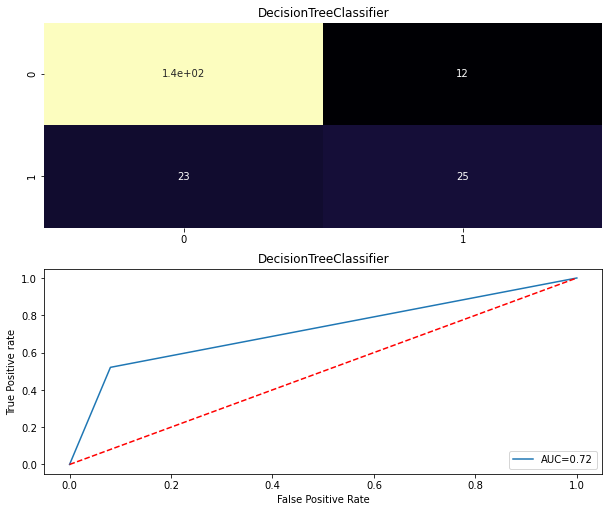

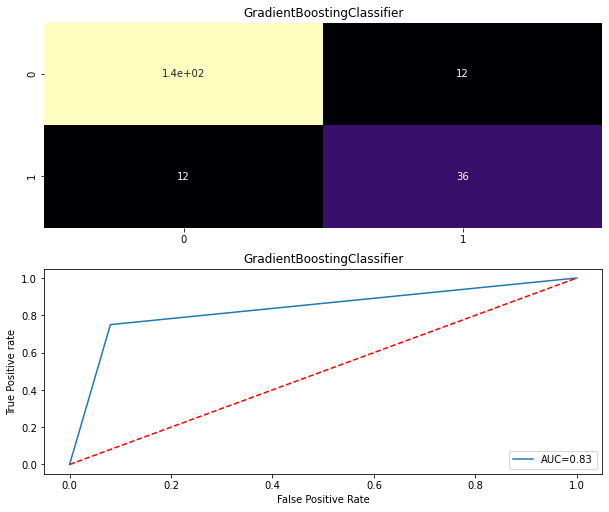

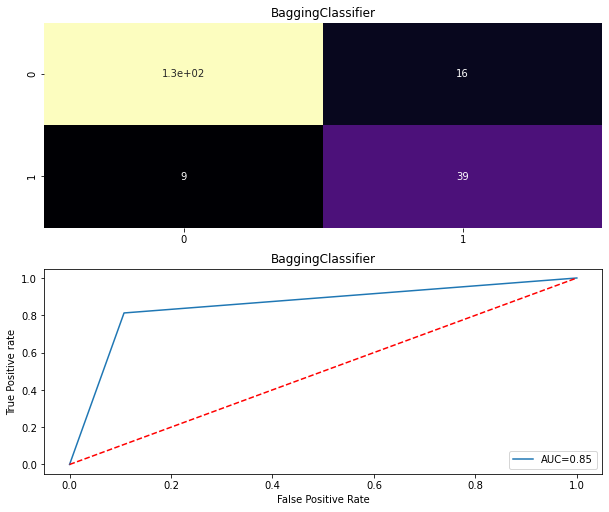

In [92]:
Model=[]
score=[]
CVS=[]
ROC_Score=[]

for name,model in models:
    print('*******************************',name,'*******************************')
    print('\n')
    Model.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score :',AS)
    score.append(AS*100)
    print('\n')
    
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print("Cross Val Score : ",cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_SCORE
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("ROC_AUC_SCORE : ",roc_auc)
    ROC_Score.append(roc_auc*100)
    print("\n")
    
    #confusion matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification_report \n",classification_report(y_test,pred))
    print('\n')
    
    
    #Confusion matrix via heatmap
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='magma'))
    plt.subplot(912)
    plt.title(name)
    
    #ROC_Curve
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('False Positive Rate')
    print('\n')

### Storing the result in a dataframe

In [94]:
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Val_Score':CVS,'ROC_AUC_SCORE':ROC_Score})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_SCORE
0,LogisticRegression,78.680203,78.003108,64.017058
1,DecisionTreeClassifier,82.233503,77.804196,72.014821
2,GradientBoostingClassifier,87.817259,82.703963,83.473154
3,BaggingClassifier,87.309645,84.228438,85.255872


### Saving the model

In [95]:
import joblib
joblib.dump(bc,'Auto_Insaurance_Fraud_BC.pkl')

['Auto_Insaurance_Fraud_BC.pkl']